In [ ]:
#import tensorflow as tf
import cv2
import numpy as np
import os

import tensorflow as tf

import pywt

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,classification_report

In [92]:
def image_to_grey_scale(path):
    if os.path.isfile(path):
        image=cv2.imread(path)
        img_rgb1=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        img_gray=cv2.cvtColor(img_rgb1,cv2.COLOR_RGB2GRAY)
        print("read successfully")
        return img_gray,img_rgb1
    else:
        print("file path is not exist")

In [93]:
def finding_face_and_eyes(path,i_class,image):
    img_gr,img_color=image_to_grey_scale(path)
    
    eye_cascade=cv2.CascadeClassifier("./haar-cascade-files-master/haar-cascade-files-master/haarcascade_eye.xml")
    face_cascade=cv2.CascadeClassifier("./haar-cascade-files-master/haar-cascade-files-master/haarcascade_frontalface_default.xml")
    face = face_cascade.detectMultiScale(img_gr, scaleFactor=1.1, minNeighbors=5)
    for i,(x, y, w, h) in enumerate(face):
        roi=img_gr[y:y+h, x:x+w]
        roi_color=img_color[y:y+h,x:x+h]
        eye = eye_cascade.detectMultiScale(roi, scaleFactor=1.1, minNeighbors=5)
        if len(eye) == 2:
            path1 = os.path.join("cropped_images",i_class)
            if os.path.exists(path1):
                print("path exists")
                output_path = os.path.join("cropped_images",i_class,f"{i}{image}")
                cv2.imwrite(output_path, roi_color)
            else:
                if os.path.exists("./cropped_images"):
                    os.makedirs(os.path.join("cropped_images",i_class))
                    print("created",i_class)
                    output_path = os.path.join("cropped_images",i_class,f"{i}{image}")
                    cv2.imwrite(output_path, roi_color)
                else:
                    os.makedirs("cropped_images")
                    print("directory created")
                    os.makedirs(os.path.join("cropped_images",i_class))
                    print("created",i_class)
                    output_path = os.path.join("cropped_images",i_class,f"{i}{image}")
                    cv2.imwrite(output_path, roi_color)

In [5]:
for i_class in os.listdir("./political leaders"):
    for image in os.listdir(os.path.join("political leaders",i_class)):
        finding_face_and_eyes(os.path.join("political leaders",i_class,image),i_class, image)

read successfully
read successfully
path exists
path exists
read successfully
path exists
read successfully
read successfully
path exists
read successfully
path exists
read successfully
read successfully
path exists
read successfully
path exists
read successfully
path exists
read successfully
read successfully
path exists
read successfully
read successfully
read successfully
read successfully
path exists
read successfully
read successfully
path exists
read successfully
path exists
read successfully
path exists
path exists
read successfully
path exists
read successfully
path exists
read successfully
read successfully
read successfully
path exists
path exists
read successfully
path exists
read successfully
path exists
read successfully
path exists
read successfully
path exists
read successfully
path exists
read successfully
path exists
read successfully
read successfully
read successfully
path exists
read successfully
read successfully
path exists
read successfully
path exists
path exist

In [190]:
def w2d1(img,mode="haar",level=1):
    imarray=img
    imarray=cv2.cvtColor(imarray,cv2.COLOR_BGR2GRAY)
    imarray=np.float32(imarray)
    imarray/=255
    co=pywt.wavedec2(imarray,mode,level)
    co_h=list(co)
    co_h[0]*=0
    imarray_h=pywt.waverec2(co_h,mode)
    imarray_h*=255
    imarray_h=np.uint8(imarray_h)
    return imarray_h

In [64]:
class_political_leaders_dict={}

In [142]:
image_path=[]

image_path1=[]

image_path2=[]

for image in os.listdir(os.path.join("cropped_images","ys jagan")):
    image_path.append(os.path.join("cropped_images","ys jagan",image))

for image in os.listdir(os.path.join("cropped_images","pawan kalyan")):
    image_path1.append(os.path.join("cropped_images","pawan kalyan",image))

for image in os.listdir(os.path.join("cropped_images","nara chadra babu naidu")):
    image_path2.append(os.path.join("cropped_images","nara chadra babu naidu",image))

class_political_leaders_dict["ys jagan"]=image_path

class_political_leaders_dict["pawan kalyan"]=image_path1

class_political_leaders_dict["nara chadra babu naidu"]=image_path2

class_political_leaders_dict

{'ys jagan': ['cropped_images\\ys jagan\\01558883658-7307.jpg',
  'cropped_images\\ys jagan\\0Holysmoke3.jpg',
  'cropped_images\\ys jagan\\0jGFXbzd__400x400.jpg',
  'cropped_images\\ys jagan\\0newindianexpress_2024-04_9bf2198c-212a-497c-9dce-2a58f7513ec1_NET_WORTH.jpg',
  'cropped_images\\ys jagan\\0The_Chief_Minister_of_Andhra_Pradesh,_Shri_Y.S._Jagan_Mohan_Reddy.jpg',
  'cropped_images\\ys jagan\\0Y-S-Jaganmohan-Reddy-770x433.jpg',
  'cropped_images\\ys jagan\\0ys-jagan-mohan-reddy-1712491178.jpg',
  'cropped_images\\ys jagan\\0YS-Jagan-Mohan-Reddy-Contact-Number-WhatsApp-Phone-No-Email-ID-Office-Address.jpg',
  'cropped_images\\ys jagan\\0YS-Jagan-Mohan-Reddy.jpg',
  'cropped_images\\ys jagan\\0YS-Jagan-Mohan-Reddy1.jpg',
  'cropped_images\\ys jagan\\0YSRCP-leader-YS-Jagan-Mohan-Reddy-said-that-his-pa_1719036410796_1719036423427.jpg',
  'cropped_images\\ys jagan\\0Ys_Jagan_Meeting_7e39546a85.jpg',
  'cropped_images\\ys jagan\\138576832-e0ee-410c-bcfc-4a92831ec824_0.jpg',
  'cropped

In [143]:
dict={}
count=0
for name in class_political_leaders_dict.keys():
    dict[name]=count
    count+=1
dict

{'ys jagan': 0, 'pawan kalyan': 1, 'nara chadra babu naidu': 2}

47

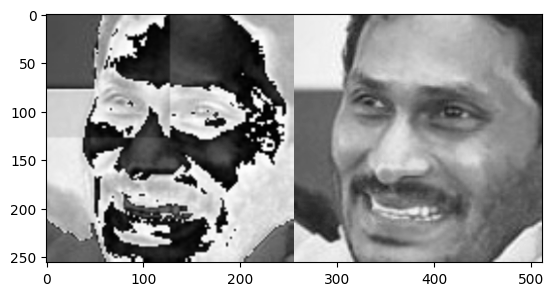

In [192]:
x=[]
y=[]
combined_image=[]
for name , paths in class_political_leaders_dict.items():
    for path in paths:
        img = cv2.imread(path)
        img_sca=cv2.resize(img,(256,256))
        img_sca=cv2.cvtColor(img_sca,cv2.COLOR_RGB2GRAY)
        #print(img_sca.size)
        imhar=w2d1(img,'db1',5)
        #print(imhar.size)
        img_ha=cv2.resize(imhar,(256,256))
        #img_sha=cv2.cvtColor(img_ha,cv2.COLOR_RGB2GRAY)
        #print(img_sha.size)
        combined_image=np.hstack((img_ha.reshape(256,256,1),img_sca.reshape(256,256,1)))
        x.append(combined_image)
        y.append(dict[name])
len(x[0])
plt.imshow(x[0],cmap="gray")
len(y)

In [171]:
256*256

65536

In [186]:
x= np.array(x).reshape(len(x),256,512,1).astype("float32")

In [163]:
512*512

262144

In [187]:
x.shape

(47, 256, 512, 1)

In [71]:
x_norm= x/255.0

In [72]:
x_norm.shape

(47, 256, 512, 1)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2,random_state=42)

In [75]:
x_test.shape

(10, 256, 512, 1)

In [76]:
model1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),1,activation="relu",input_shape=(256,512,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,(3,3),1,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16,(3,3),1,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")
])
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [77]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 510, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 255, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 253, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 126, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 124, 16)         │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 29760)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │       2,976,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,985,827 (11.39 MB)

 Trainable params: 2,985,827 (11.39 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
history=model1.fit(np.array(x_train),np.array(y_train),epochs=20)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.3204 - loss: 1.0996
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.4910 - loss: 0.9775
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.6332 - loss: 0.8153
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9716 - loss: 0.6552
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 1.0000 - loss: 0.4557
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.9535 - loss: 0.2724
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9716 - loss: 0.1613
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 1.0000 - loss: 0.0856
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 1.0000 - loss: 0.0318
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 1.0000 - loss: 0.0393
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 1.0000 - loss: 0.0123
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 1.0000 - lo

In [79]:
model1.evaluate(np.array(x_test),np.array(y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.7000 - loss: 1.2439


[1.2438740730285645, 0.699999988079071]

In [80]:
y_pred=model1.predict(np.array(x_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


In [81]:
y_pred,y_test

(array([[3.7809980e-01, 6.1612654e-01, 5.7736691e-03],
        [1.6185057e-01, 5.3542376e-01, 3.0272564e-01],
        [4.0798730e-01, 5.8898044e-01, 3.0322815e-03],
        [3.6933828e-02, 1.3937829e-04, 9.6292681e-01],
        [1.3262163e-05, 9.9998677e-01, 2.0633657e-08],
        [3.6933828e-02, 1.3937829e-04, 9.6292681e-01],
        [9.9989736e-01, 2.6858947e-05, 7.5811506e-05],
        [1.7411108e-01, 8.2586986e-01, 1.9002924e-05],
        [2.1796790e-01, 7.8203207e-01, 5.6666792e-08],
        [9.9978238e-01, 2.1610397e-04, 1.5943550e-06]], dtype=float32),
 [1, 2, 1, 2, 1, 2, 0, 1, 0, 1])

Text(0, 0.5, 'loss')

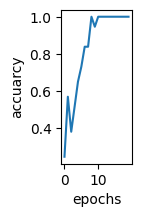

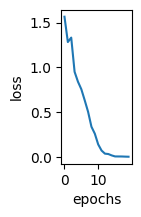

In [646]:
plt.figure(figsize=(2,2))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuarcy")

plt.figure(figsize=(2,2))
plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")



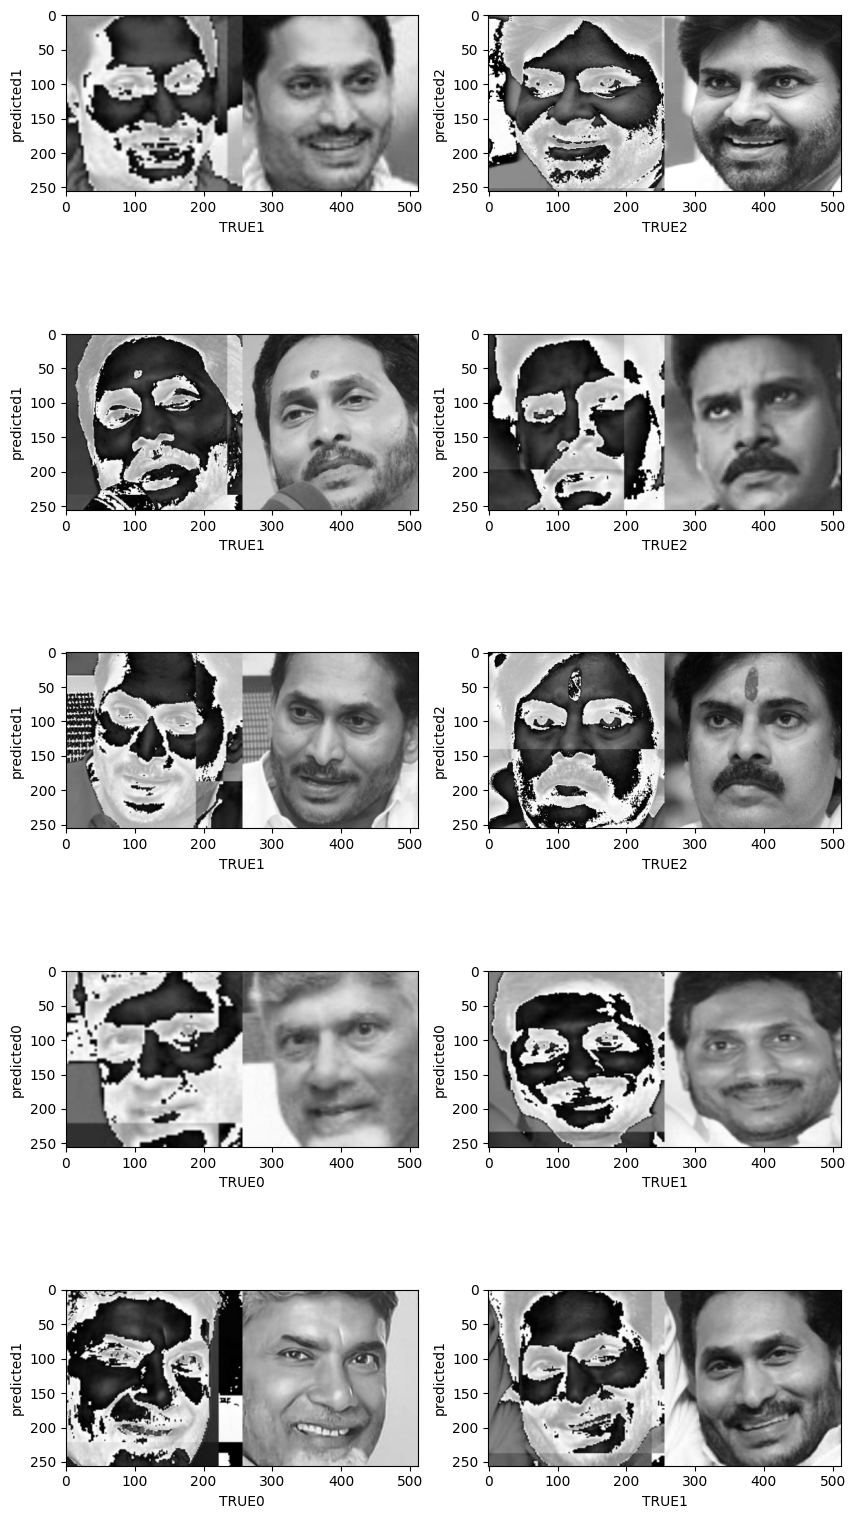

In [649]:
plt.figure(figsize=(10,20))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(np.array(x_test[i]),cmap="gray")
    plt.xlabel(f"TRUE{np.array(y_test[i])}")
    plt.ylabel(f"predicted{np.argmax(y_pred[i])}")

In [651]:
y_pred_max=[]

In [652]:
for i in range(10):
    y_pred_max.append(np.argmax(y_pred[i]))

In [653]:
y_pred_max

[1, 2, 1, 1, 1, 2, 0, 0, 1, 1]

In [654]:
cns1=[]

In [655]:
cns1=confusion_matrix(np.array(y_test),y_pred_max)

In [656]:
cns1

array([[1, 1, 0],
       [1, 4, 0],
       [0, 1, 2]], dtype=int64)

<Axes: >

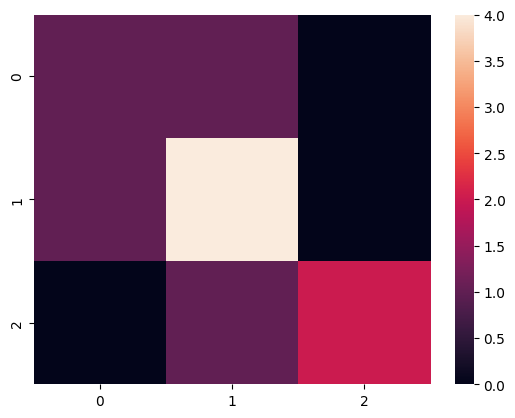

In [657]:
sns.heatmap(cns1)

In [82]:
model1.save(os.path.join("models","my_model.keras"))

In [83]:
loaded=tf.keras.models.load_model(os.path.join("models","my_model.keras"))

In [84]:
loaded.predict(np.array(x_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


array([[3.7809980e-01, 6.1612654e-01, 5.7736691e-03],
       [1.6185057e-01, 5.3542376e-01, 3.0272564e-01],
       [4.0798730e-01, 5.8898044e-01, 3.0322815e-03],
       [3.6933828e-02, 1.3937829e-04, 9.6292681e-01],
       [1.3262163e-05, 9.9998677e-01, 2.0633657e-08],
       [3.6933828e-02, 1.3937829e-04, 9.6292681e-01],
       [9.9989736e-01, 2.6858947e-05, 7.5811506e-05],
       [1.7411108e-01, 8.2586986e-01, 1.9002924e-05],
       [2.1796790e-01, 7.8203207e-01, 5.6666792e-08],
       [9.9978238e-01, 2.1610397e-04, 1.5943550e-06]], dtype=float32)

In [658]:
f=classification_report(np.array(y_test),y_pred_max)

In [660]:
f

'              precision    recall  f1-score   support\n\n           0       0.50      0.50      0.50         2\n           1       0.67      0.80      0.73         5\n           2       1.00      0.67      0.80         3\n\n    accuracy                           0.70        10\n   macro avg       0.72      0.66      0.68        10\nweighted avg       0.73      0.70      0.70        10\n'

In [622]:
y_pred_max1=[]

In [623]:
for i in range(10):
    y_pred_max1.append(np.argmax(y_pred[i]))

In [624]:
y_pred_max

[1, 1, 1, 1, 0, 2, 0, 0, 1, 1]

In [625]:
cns12=confusion_matrix(np.array(y_test),y_pred_max)

In [661]:
cns12

array([[1, 1, 0],
       [2, 3, 0],
       [0, 2, 1]], dtype=int64)

<Axes: >

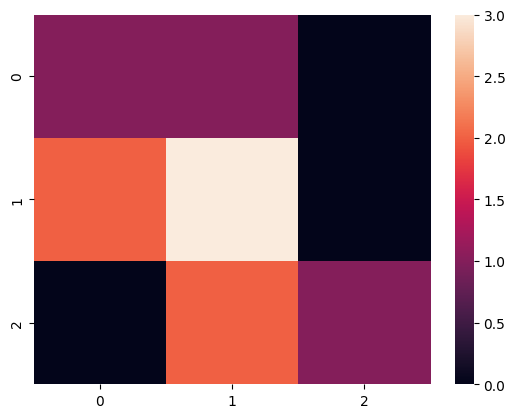

In [626]:
sns.heatmap(cns1)

In [ ]:
def making_dictionary(class_political_leaders_dict):
    class_political_leaders_dict={}
    image_path=[]
    image_path1=[]
    image_path2=[]
    for image in os.listdir(os.path.join("cropped_images","ys jagan")):
        image_path.append(os.path.join("cropped_images","ys jagan",image))
    for image in os.listdir(os.path.join("cropped_images","pawan kalyan")):
        image_path1.append(os.path.join("cropped_images","pawan kalyan",image))
    for image in os.listdir(os.path.join("cropped_images","nara chadra babu naidu")):
        image_path2.append(os.path.join("cropped_images","nara chadra babu naidu",image))
    class_political_leaders_dict["ys jagan"]=image_path
    class_political_leaders_dict["pawan kalyan"]=image_path1
    class_political_leaders_dict["nara chadra babu naidu"]=image_path2
    
    return class_political_leaders_dict

In [ ]:
def making_labels(class_political_leaders_dict):
    dicts={}
    count=0
    for name in class_political_leaders_dict.keys():
        dicts[name]=count
        count+=1
    return dicts

In [125]:
def making_x(image3):
    x=[]
    #img = cv2.imread(imagepath)
    img_sca=cv2.resize(image3,(256,256))
    #img_sca=cv2.cvtColor(img_sca,cv2.COLOR_RGB2GRAY)
    imhar=w2d(img_sca,'db1',4)
    img_har_sca=cv2.resize(imhar,(256,256))
    combined_image=np.hstack((img_har_sca.reshape(256,256,1),img_sca.reshape(256,256,1)))
    x.append(combined_image)
    x= np.array(x).reshape(len(x),256,512,1).astype("float32")
    x= x/255.0
    return x

In [3]:
def slpiting_the_train_and_test(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2,random_state=42)
    return x_train,x_test,y_train,y_test

In [4]:
def making_model(model1):
    model1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),1,activation="relu",input_shape=(256,512,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,(3,3),1,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16,(3,3),1,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")
    ])
    model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
    return model1    

In [6]:
def fitting_data(model1):
    return model1.fit(np.array(x_train),np.array(y_train),epochs=20)

In [7]:
def predicting_the_data(model1,x_test):
    y_pred= model.predict(np.array(x_test))
    return y_pred

In [85]:
def saveing_the_model(model1,filepath):
    model1.save(filepath)

In [193]:
def w2d(img,mode="haar",level=1):
    imarray=img
    #imarray=cv2.cvtColor(imarray,cv2.COLOR_BGR2GRAY)
    imarray=np.float32(imarray)
    imarray/=255
    co=pywt.wavedec2(imarray,mode,level)
    co_h=list(co)
    co_h[0]*=0
    imarray_h=pywt.waverec2(co_h,mode)
    imarray_h*=255
    imarray_h=np.uint8(imarray_h)
    return imarray_h

In [194]:
def image_predicting(imagepath):
    image=cv2.imread(imagepath)
    #plt.imshow(image)
    image1=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #plt.imshow(image1,cmap="gray")
    face_cascade=cv2.CascadeClassifier("./haar-cascade-files-master/haar-cascade-files-master/haarcascade_frontalface_default.xml")
    face=face_cascade.detectMultiScale(image1)
    for (x,y,w,h) in face:
        face_cropped=image1[y:y+h,x:x+w]
        break
    x_1=making_x(face_cropped)
    loaded=tf.keras.models.load_model(os.path.join("models","my_model.keras"))
    y=loaded.predict(x_1)
    print(y)
    print("pawan kalyan",(y[0][0])*100,"%")
    print("nara chandra babu naidu",(y[0][1])*100,"%")
    print("ys jagan",(y[0][2])*100,"%")

In [195]:
image_predicting(os.path.join("political leaders","nara chadra babu naidu","em.jpg"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
[[7.0718221e-02 1.4638065e-04 9.2913532e-01]]
pawan kalyan 7.071822136640549 %
nara chandra babu naidu 0.01463806547690183 %
ys jagan 92.91353225708008 %
